<a href="https://colab.research.google.com/github/lmaheshds/EVA6-Assignment9-RHRF/blob/main/Assign9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [145]:
!pip install albumentations==0.4.6

# Cloning Git Repo

In [160]:
!git clone "https://github.com/lmaheshds/EVA6-Assignment9-RHRF.git"

Cloning into 'EVA6-Assignment9-RHRF'...
remote: Enumerating objects: 86, done.
remote: Counting objects: 100% (86/86), done.
remote: Compressing objects: 100% (80/80), done.
remote: Total 86 (delta 26), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (86/86), done.


Change Directory

In [161]:
%cd "EVA6-Assignment9-RHRF/Allfiles/"

/content/EVA6-Assignment9-RHRF-/Allfiles/EVA6-Assignment9-RHRF-/Allfiles/EVA6-Assignment9-RHRF-/Allfiles/EVA6-Assignment9-RHRF/Allfiles/EVA6-Assignment9-RHRF/Allfiles/EVA6-Assignment9-RHRF/Allfiles/EVA6-Assignment9-RHRF/Allfiles


CIFAR-10 Data Loading

In [162]:
from dataloader import ImageDataLoader
from datatransform import CIFAR10Transforms
import albumentations as A

In [163]:
DATA_DIR = 'data'

cifar10 = CIFAR10Transforms()

custom_train_tfms = [A.PadIfNeeded(min_height=40,min_width=40), 
                     A.RandomCrop(32, 32, p=1.0),
                     A.HorizontalFlip(),
                     A.Cutout(num_holes=2, max_h_size=8, max_w_size=8, fill_value=0, always_apply=False, p=0.1),
                     ]
train_transform,  test_transform = cifar10.build_transforms(train_tfms_list=custom_train_tfms, test_tfms_list=[])

image_loader = ImageDataLoader(train_transform, test_transform, DATA_DIR, 512, True, 'CIFAR10', figure_size=(20,10))


Extracting data/cifar-10-python.tar.gz to data
Files already downloaded and verified


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Train data

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


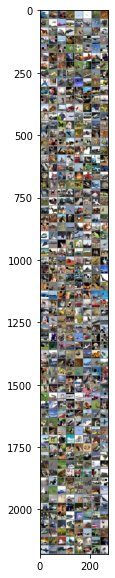

In [164]:
image_loader.show(dataset_type='train')

Test Data

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


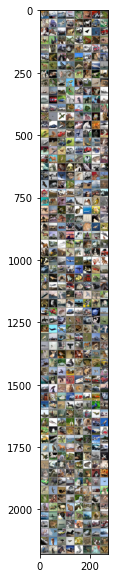

In [165]:
image_loader.show(dataset_type='test')

Custom ResNet Architecture

In [166]:
import torch.nn as nn
import torch.nn.functional as F
from resnetmodels import CustomResNet
from traintest import Learner

In [167]:
criterion = F.nll_loss
cnn_learner = Learner(train_loader=image_loader.train_loader, test_loader=image_loader.test_loader, model=CustomResNet(),loss_func=criterion)

Model Summary

In [168]:
cnn_learner.summary(input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
              ReLU-3           [-1, 64, 32, 32]               0
            Conv2d-4          [-1, 128, 32, 32]          73,728
         MaxPool2d-5          [-1, 128, 16, 16]               0
       BatchNorm2d-6          [-1, 128, 16, 16]             256
              ReLU-7          [-1, 128, 16, 16]               0
            Conv2d-8          [-1, 128, 16, 16]         147,456
       BatchNorm2d-9          [-1, 128, 16, 16]             256
           Conv2d-10          [-1, 128, 16, 16]         147,456
      BatchNorm2d-11          [-1, 128, 16, 16]             256
       BasicBlock-12          [-1, 128, 16, 16]               0
           Conv2d-13          [-1, 256, 16, 16]         294,912
        MaxPool2d-14            [-1, 25

Learning rates

In [169]:
import torch
import torch.optim as optim
from learningratefinder import LRFinder

LR Minimum

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Stopping early, the loss has diverged
Learning rate search finished. See the graph with {finder_name}.plot()
LR suggestion: steepest gradient
Suggested LR: 1.43E-03


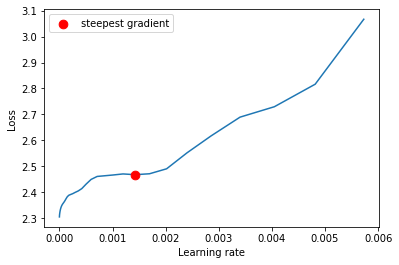

In [170]:
optimizer=optim.SGD(cnn_learner.model.parameters(), lr=1e-7, momentum=0.9, weight_decay=cnn_learner.weight_decay)
lr_finder = LRFinder(cnn_learner.model, optimizer, criterion, device="cuda" )
lr_finder.range_test(train_loader=image_loader.train_loader, val_loader=image_loader.test_loader, end_lr=3, num_iter=100)
lr_finder.plot(log_lr=False)
lr_finder.reset()

LR Maximum

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Stopping early, the loss has diverged
Learning rate search finished. See the graph with {finder_name}.plot()
LR suggestion: steepest gradient
Suggested LR: 9.33E-02


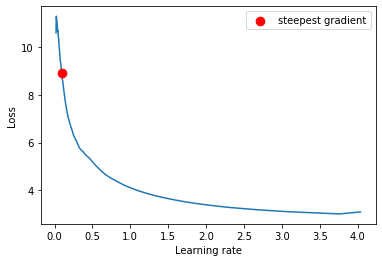

In [171]:
optimizer=optim.SGD(cnn_learner.model.parameters(), lr=1e-2, momentum=0.9, weight_decay=cnn_learner.weight_decay)
lr_finder = LRFinder(cnn_learner.model, optimizer, criterion, device="cuda" )
lr_finder.range_test(image_loader.train_loader, end_lr=10, num_iter=100)
lr_finder.plot(log_lr=False)
lr_finder.reset()

Training the model

In [192]:
lr_max= 8.11E-02
lr_min = 1.01E-03
optimizer=optim.SGD(cnn_learner.model.parameters(), lr=0.05, momentum=0.9, weight_decay=cnn_learner.weight_decay)
lr_scheduler = torch.optim.lr_scheduler.CyclicLR(optimizer, base_lr=lr_min, max_lr=lr_max, step_size_up=490, step_size_down=1470)

In [193]:
cnn_learner.fit_custom(25,optimizer,lr_scheduler,pass_loss=False)


  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 0


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))

Loss=0.03302265703678131 Batch_id=0 Accuracy=98.63:   0%|          | 0/98 [00:01<?, ?it/s]
Loss=0.03302265703678131 Batch_id=0 Accuracy=98.63:   1%|          | 1/98 [00:01<01:46,  1.09s/it]
Loss=0.05449244752526283 Batch_id=1 Accuracy=98.34:   1%|          | 1/98 [00:01<01:46,  1.09s/it]
Loss=0.05449244752526283 Batch_id=1 Accuracy=98.34:   2%|▏         | 2/98 [00:01<01:20,  1.19it/s]
Loss=0.03044535219669342 Batch_id=2 Accuracy=98.57:   2%|▏         | 2/98 [00:01<01:20,  1.19it/s]
Loss=0.03044535219669342 Batch_id=2 Accuracy=98.57:   3%


Test set: Average loss: 0.4274, Accuracy: 8989/10000 (89.89%)

EPOCH: 1



Loss=0.017632441595196724 Batch_id=0 Accuracy=99.61:   0%|          | 0/98 [00:01<?, ?it/s]
Loss=0.017632441595196724 Batch_id=0 Accuracy=99.61:   1%|          | 1/98 [00:01<01:41,  1.05s/it]
Loss=0.03960585966706276 Batch_id=1 Accuracy=99.41:   1%|          | 1/98 [00:01<01:41,  1.05s/it] 
Loss=0.03960585966706276 Batch_id=1 Accuracy=99.41:   2%|▏         | 2/98 [00:01<01:18,  1.22it/s]
Loss=0.024128491058945656 Batch_id=2 Accuracy=99.35:   2%|▏         | 2/98 [00:01<01:18,  1.22it/s]
Loss=0.024128491058945656 Batch_id=2 Accuracy=99.35:   3%|▎         | 3/98 [00:01<01:01,  1.54it/s]
Loss=0.01908925548195839 Batch_id=3 Accuracy=99.32:   3%|▎         | 3/98 [00:01<01:01,  1.54it/s] 
Loss=0.01908925548195839 Batch_id=3 Accuracy=99.32:   4%|▍         | 4/98 [00:01<00:50,  1.85it/s]
Loss=0.01512299757450819 Batch_id=4 Accuracy=99.38:   4%|▍         | 4/98 [00:02<00:50,  1.85it/s]
Loss=0.01512299757450819 Batch_id=4 Accuracy=99.38:   5%|▌         | 5/98 [00:02<00:42,  2.19it/s]
Loss=0.0361


Test set: Average loss: 0.4159, Accuracy: 9030/10000 (90.30%)

EPOCH: 2



Loss=0.03568551689386368 Batch_id=0 Accuracy=98.44:   0%|          | 0/98 [00:00<?, ?it/s]
Loss=0.03568551689386368 Batch_id=0 Accuracy=98.44:   1%|          | 1/98 [00:00<01:34,  1.02it/s]
Loss=0.013740274123847485 Batch_id=1 Accuracy=99.12:   1%|          | 1/98 [00:01<01:34,  1.02it/s]
Loss=0.013740274123847485 Batch_id=1 Accuracy=99.12:   2%|▏         | 2/98 [00:01<01:12,  1.32it/s]
Loss=0.027157509699463844 Batch_id=2 Accuracy=99.15:   2%|▏         | 2/98 [00:01<01:12,  1.32it/s]
Loss=0.027157509699463844 Batch_id=2 Accuracy=99.15:   3%|▎         | 3/98 [00:01<00:58,  1.63it/s]
Loss=0.025510430335998535 Batch_id=3 Accuracy=99.02:   3%|▎         | 3/98 [00:01<00:58,  1.63it/s]
Loss=0.025510430335998535 Batch_id=3 Accuracy=99.02:   4%|▍         | 4/98 [00:01<00:47,  1.98it/s]
Loss=0.020396267995238304 Batch_id=4 Accuracy=99.06:   4%|▍         | 4/98 [00:01<00:47,  1.98it/s]
Loss=0.020396267995238304 Batch_id=4 Accuracy=99.06:   5%|▌         | 5/98 [00:02<00:39,  2.33it/s]
Loss=0.01


Test set: Average loss: 0.4182, Accuracy: 9023/10000 (90.23%)

EPOCH: 3



Loss=0.01773391291499138 Batch_id=0 Accuracy=99.61:   0%|          | 0/98 [00:00<?, ?it/s]
Loss=0.01773391291499138 Batch_id=0 Accuracy=99.61:   1%|          | 1/98 [00:00<01:36,  1.01it/s]
Loss=0.01042900700122118 Batch_id=1 Accuracy=99.80:   1%|          | 1/98 [00:01<01:36,  1.01it/s]
Loss=0.01042900700122118 Batch_id=1 Accuracy=99.80:   2%|▏         | 2/98 [00:01<01:14,  1.30it/s]
Loss=0.010995890945196152 Batch_id=2 Accuracy=99.74:   2%|▏         | 2/98 [00:01<01:14,  1.30it/s]
Loss=0.010995890945196152 Batch_id=2 Accuracy=99.74:   3%|▎         | 3/98 [00:01<00:58,  1.62it/s]
Loss=0.009690357372164726 Batch_id=3 Accuracy=99.76:   3%|▎         | 3/98 [00:01<00:58,  1.62it/s]
Loss=0.009690357372164726 Batch_id=3 Accuracy=99.76:   4%|▍         | 4/98 [00:01<00:48,  1.96it/s]
Loss=0.018700066953897476 Batch_id=4 Accuracy=99.73:   4%|▍         | 4/98 [00:02<00:48,  1.96it/s]
Loss=0.018700066953897476 Batch_id=4 Accuracy=99.73:   5%|▌         | 5/98 [00:02<00:40,  2.30it/s]
Loss=0.0265


Test set: Average loss: 0.4219, Accuracy: 9005/10000 (90.05%)

EPOCH: 4



Loss=0.02126523107290268 Batch_id=0 Accuracy=99.22:   0%|          | 0/98 [00:01<?, ?it/s]
Loss=0.02126523107290268 Batch_id=0 Accuracy=99.22:   1%|          | 1/98 [00:01<01:39,  1.02s/it]
Loss=0.021698027849197388 Batch_id=1 Accuracy=99.41:   1%|          | 1/98 [00:01<01:39,  1.02s/it]
Loss=0.021698027849197388 Batch_id=1 Accuracy=99.41:   2%|▏         | 2/98 [00:01<01:16,  1.25it/s]
Loss=0.009727799333631992 Batch_id=2 Accuracy=99.61:   2%|▏         | 2/98 [00:01<01:16,  1.25it/s]
Loss=0.009727799333631992 Batch_id=2 Accuracy=99.61:   3%|▎         | 3/98 [00:01<01:00,  1.57it/s]
Loss=0.026946306228637695 Batch_id=3 Accuracy=99.46:   3%|▎         | 3/98 [00:01<01:00,  1.57it/s]
Loss=0.026946306228637695 Batch_id=3 Accuracy=99.46:   4%|▍         | 4/98 [00:01<00:48,  1.92it/s]
Loss=0.010366911999881268 Batch_id=4 Accuracy=99.49:   4%|▍         | 4/98 [00:02<00:48,  1.92it/s]
Loss=0.010366911999881268 Batch_id=4 Accuracy=99.49:   5%|▌         | 5/98 [00:02<00:41,  2.26it/s]
Loss=0.01


Test set: Average loss: 0.4212, Accuracy: 9025/10000 (90.25%)

EPOCH: 5



Loss=0.017081046476960182 Batch_id=0 Accuracy=99.61:   0%|          | 0/98 [00:01<?, ?it/s]
Loss=0.017081046476960182 Batch_id=0 Accuracy=99.61:   1%|          | 1/98 [00:01<01:43,  1.06s/it]
Loss=0.015408731065690517 Batch_id=1 Accuracy=99.61:   1%|          | 1/98 [00:01<01:43,  1.06s/it]
Loss=0.015408731065690517 Batch_id=1 Accuracy=99.61:   2%|▏         | 2/98 [00:01<01:18,  1.22it/s]
Loss=0.02763635478913784 Batch_id=2 Accuracy=99.61:   2%|▏         | 2/98 [00:01<01:18,  1.22it/s] 
Loss=0.02763635478913784 Batch_id=2 Accuracy=99.61:   3%|▎         | 3/98 [00:01<01:02,  1.53it/s]
Loss=0.029700836166739464 Batch_id=3 Accuracy=99.51:   3%|▎         | 3/98 [00:01<01:02,  1.53it/s]
Loss=0.029700836166739464 Batch_id=3 Accuracy=99.51:   4%|▍         | 4/98 [00:01<00:50,  1.85it/s]
Loss=0.007336755748838186 Batch_id=4 Accuracy=99.61:   4%|▍         | 4/98 [00:02<00:50,  1.85it/s]
Loss=0.007336755748838186 Batch_id=4 Accuracy=99.61:   5%|▌         | 5/98 [00:02<00:42,  2.20it/s]
Loss=0.0


Test set: Average loss: 0.4422, Accuracy: 8993/10000 (89.93%)

EPOCH: 6



Loss=0.020484687760472298 Batch_id=0 Accuracy=99.22:   0%|          | 0/98 [00:01<?, ?it/s]
Loss=0.020484687760472298 Batch_id=0 Accuracy=99.22:   1%|          | 1/98 [00:01<01:40,  1.03s/it]
Loss=0.021471088752150536 Batch_id=1 Accuracy=99.32:   1%|          | 1/98 [00:01<01:40,  1.03s/it]
Loss=0.021471088752150536 Batch_id=1 Accuracy=99.32:   2%|▏         | 2/98 [00:01<01:16,  1.25it/s]
Loss=0.013877911493182182 Batch_id=2 Accuracy=99.48:   2%|▏         | 2/98 [00:01<01:16,  1.25it/s]
Loss=0.013877911493182182 Batch_id=2 Accuracy=99.48:   3%|▎         | 3/98 [00:01<01:00,  1.57it/s]
Loss=0.022414961829781532 Batch_id=3 Accuracy=99.51:   3%|▎         | 3/98 [00:01<01:00,  1.57it/s]
Loss=0.022414961829781532 Batch_id=3 Accuracy=99.51:   4%|▍         | 4/98 [00:01<00:49,  1.89it/s]
Loss=0.008672954514622688 Batch_id=4 Accuracy=99.61:   4%|▍         | 4/98 [00:02<00:49,  1.89it/s]
Loss=0.008672954514622688 Batch_id=4 Accuracy=99.61:   5%|▌         | 5/98 [00:02<00:41,  2.25it/s]
Loss=0.


Test set: Average loss: 0.4209, Accuracy: 9024/10000 (90.24%)

EPOCH: 7



Loss=0.013544118963181973 Batch_id=0 Accuracy=99.80:   0%|          | 0/98 [00:00<?, ?it/s]
Loss=0.013544118963181973 Batch_id=0 Accuracy=99.80:   1%|          | 1/98 [00:00<01:35,  1.02it/s]
Loss=0.033251870423555374 Batch_id=1 Accuracy=99.41:   1%|          | 1/98 [00:01<01:35,  1.02it/s]
Loss=0.033251870423555374 Batch_id=1 Accuracy=99.41:   2%|▏         | 2/98 [00:01<01:13,  1.30it/s]
Loss=0.01981653831899166 Batch_id=2 Accuracy=99.41:   2%|▏         | 2/98 [00:01<01:13,  1.30it/s] 
Loss=0.01981653831899166 Batch_id=2 Accuracy=99.41:   3%|▎         | 3/98 [00:01<00:58,  1.62it/s]
Loss=0.019814321771264076 Batch_id=3 Accuracy=99.46:   3%|▎         | 3/98 [00:01<00:58,  1.62it/s]
Loss=0.019814321771264076 Batch_id=3 Accuracy=99.46:   4%|▍         | 4/98 [00:01<00:48,  1.94it/s]
Loss=0.022821035236120224 Batch_id=4 Accuracy=99.45:   4%|▍         | 4/98 [00:02<00:48,  1.94it/s]
Loss=0.022821035236120224 Batch_id=4 Accuracy=99.45:   5%|▌         | 5/98 [00:02<00:41,  2.26it/s]
Loss=0.0


Test set: Average loss: 0.4415, Accuracy: 9013/10000 (90.13%)

EPOCH: 8



Loss=0.01747015118598938 Batch_id=0 Accuracy=99.41:   0%|          | 0/98 [00:01<?, ?it/s]
Loss=0.01747015118598938 Batch_id=0 Accuracy=99.41:   1%|          | 1/98 [00:01<01:44,  1.08s/it]
Loss=0.0168001689016819 Batch_id=1 Accuracy=99.51:   1%|          | 1/98 [00:01<01:44,  1.08s/it] 
Loss=0.0168001689016819 Batch_id=1 Accuracy=99.51:   2%|▏         | 2/98 [00:01<01:19,  1.21it/s]
Loss=0.03227781131863594 Batch_id=2 Accuracy=99.35:   2%|▏         | 2/98 [00:01<01:19,  1.21it/s]
Loss=0.03227781131863594 Batch_id=2 Accuracy=99.35:   3%|▎         | 3/98 [00:01<01:02,  1.52it/s]
Loss=0.017955102026462555 Batch_id=3 Accuracy=99.27:   3%|▎         | 3/98 [00:01<01:02,  1.52it/s]
Loss=0.017955102026462555 Batch_id=3 Accuracy=99.27:   4%|▍         | 4/98 [00:01<00:50,  1.85it/s]
Loss=0.028310731053352356 Batch_id=4 Accuracy=99.22:   4%|▍         | 4/98 [00:02<00:50,  1.85it/s]
Loss=0.028310731053352356 Batch_id=4 Accuracy=99.22:   5%|▌         | 5/98 [00:02<00:42,  2.20it/s]
Loss=0.0173389


Test set: Average loss: 0.4248, Accuracy: 9016/10000 (90.16%)

EPOCH: 9



Loss=0.013439476490020752 Batch_id=0 Accuracy=99.61:   0%|          | 0/98 [00:01<?, ?it/s]
Loss=0.013439476490020752 Batch_id=0 Accuracy=99.61:   1%|          | 1/98 [00:01<01:38,  1.02s/it]
Loss=0.017949970439076424 Batch_id=1 Accuracy=99.41:   1%|          | 1/98 [00:01<01:38,  1.02s/it]
Loss=0.017949970439076424 Batch_id=1 Accuracy=99.41:   2%|▏         | 2/98 [00:01<01:15,  1.26it/s]
Loss=0.013797597028315067 Batch_id=2 Accuracy=99.41:   2%|▏         | 2/98 [00:01<01:15,  1.26it/s]
Loss=0.013797597028315067 Batch_id=2 Accuracy=99.41:   3%|▎         | 3/98 [00:01<00:59,  1.58it/s]
Loss=0.007154288701713085 Batch_id=3 Accuracy=99.56:   3%|▎         | 3/98 [00:01<00:59,  1.58it/s]
Loss=0.007154288701713085 Batch_id=3 Accuracy=99.56:   4%|▍         | 4/98 [00:01<00:48,  1.93it/s]
Loss=0.016528509557247162 Batch_id=4 Accuracy=99.53:   4%|▍         | 4/98 [00:02<00:48,  1.93it/s]
Loss=0.016528509557247162 Batch_id=4 Accuracy=99.53:   5%|▌         | 5/98 [00:02<00:41,  2.27it/s]
Loss=0.


Test set: Average loss: 0.4218, Accuracy: 9009/10000 (90.09%)

EPOCH: 10



Loss=0.017822381108999252 Batch_id=0 Accuracy=99.02:   0%|          | 0/98 [00:00<?, ?it/s]
Loss=0.017822381108999252 Batch_id=0 Accuracy=99.02:   1%|          | 1/98 [00:00<01:21,  1.18it/s]
Loss=0.020925205200910568 Batch_id=1 Accuracy=99.22:   1%|          | 1/98 [00:01<01:21,  1.18it/s]
Loss=0.020925205200910568 Batch_id=1 Accuracy=99.22:   2%|▏         | 2/98 [00:01<01:07,  1.42it/s]
Loss=0.016553733497858047 Batch_id=2 Accuracy=99.35:   2%|▏         | 2/98 [00:01<01:07,  1.42it/s]
Loss=0.016553733497858047 Batch_id=2 Accuracy=99.35:   3%|▎         | 3/98 [00:01<00:54,  1.74it/s]
Loss=0.013269509188830853 Batch_id=3 Accuracy=99.46:   3%|▎         | 3/98 [00:01<00:54,  1.74it/s]
Loss=0.013269509188830853 Batch_id=3 Accuracy=99.46:   4%|▍         | 4/98 [00:01<00:45,  2.07it/s]
Loss=0.016364216804504395 Batch_id=4 Accuracy=99.53:   4%|▍         | 4/98 [00:02<00:45,  2.07it/s]
Loss=0.016364216804504395 Batch_id=4 Accuracy=99.53:   5%|▌         | 5/98 [00:02<00:39,  2.38it/s]
Loss=0.


Test set: Average loss: 0.4332, Accuracy: 8997/10000 (89.97%)

EPOCH: 11



Loss=0.018447870388627052 Batch_id=0 Accuracy=99.22:   0%|          | 0/98 [00:00<?, ?it/s]
Loss=0.018447870388627052 Batch_id=0 Accuracy=99.22:   1%|          | 1/98 [00:00<01:35,  1.02it/s]
Loss=0.01827516034245491 Batch_id=1 Accuracy=99.41:   1%|          | 1/98 [00:01<01:35,  1.02it/s] 
Loss=0.01827516034245491 Batch_id=1 Accuracy=99.41:   2%|▏         | 2/98 [00:01<01:13,  1.30it/s]
Loss=0.00904530007392168 Batch_id=2 Accuracy=99.54:   2%|▏         | 2/98 [00:01<01:13,  1.30it/s]
Loss=0.00904530007392168 Batch_id=2 Accuracy=99.54:   3%|▎         | 3/98 [00:01<00:59,  1.61it/s]
Loss=0.015569056384265423 Batch_id=3 Accuracy=99.56:   3%|▎         | 3/98 [00:01<00:59,  1.61it/s]
Loss=0.015569056384265423 Batch_id=3 Accuracy=99.56:   4%|▍         | 4/98 [00:01<00:48,  1.95it/s]
Loss=0.03213674575090408 Batch_id=4 Accuracy=99.49:   4%|▍         | 4/98 [00:02<00:48,  1.95it/s] 
Loss=0.03213674575090408 Batch_id=4 Accuracy=99.49:   5%|▌         | 5/98 [00:02<00:40,  2.30it/s]
Loss=0.0164


Test set: Average loss: 0.4205, Accuracy: 9010/10000 (90.10%)

EPOCH: 12



Loss=0.010366966016590595 Batch_id=0 Accuracy=99.80:   0%|          | 0/98 [00:00<?, ?it/s]
Loss=0.010366966016590595 Batch_id=0 Accuracy=99.80:   1%|          | 1/98 [00:01<01:38,  1.01s/it]
Loss=0.01956133171916008 Batch_id=1 Accuracy=99.61:   1%|          | 1/98 [00:01<01:38,  1.01s/it] 
Loss=0.01956133171916008 Batch_id=1 Accuracy=99.61:   2%|▏         | 2/98 [00:01<01:16,  1.25it/s]
Loss=0.019908180460333824 Batch_id=2 Accuracy=99.54:   2%|▏         | 2/98 [00:01<01:16,  1.25it/s]
Loss=0.019908180460333824 Batch_id=2 Accuracy=99.54:   3%|▎         | 3/98 [00:01<01:01,  1.55it/s]
Loss=0.02958747185766697 Batch_id=3 Accuracy=99.46:   3%|▎         | 3/98 [00:01<01:01,  1.55it/s] 
Loss=0.02958747185766697 Batch_id=3 Accuracy=99.46:   4%|▍         | 4/98 [00:01<00:49,  1.89it/s]
Loss=0.01690289005637169 Batch_id=4 Accuracy=99.45:   4%|▍         | 4/98 [00:02<00:49,  1.89it/s]
Loss=0.01690289005637169 Batch_id=4 Accuracy=99.45:   5%|▌         | 5/98 [00:02<00:41,  2.24it/s]
Loss=0.0310


Test set: Average loss: 0.4473, Accuracy: 8983/10000 (89.83%)

EPOCH: 13



Loss=0.009554142132401466 Batch_id=0 Accuracy=99.80:   0%|          | 0/98 [00:01<?, ?it/s]
Loss=0.009554142132401466 Batch_id=0 Accuracy=99.80:   1%|          | 1/98 [00:01<01:37,  1.01s/it]
Loss=0.012897604145109653 Batch_id=1 Accuracy=99.80:   1%|          | 1/98 [00:01<01:37,  1.01s/it]
Loss=0.012897604145109653 Batch_id=1 Accuracy=99.80:   2%|▏         | 2/98 [00:01<01:15,  1.28it/s]
Loss=0.014225074090063572 Batch_id=2 Accuracy=99.74:   2%|▏         | 2/98 [00:01<01:15,  1.28it/s]
Loss=0.014225074090063572 Batch_id=2 Accuracy=99.74:   3%|▎         | 3/98 [00:01<00:59,  1.61it/s]
Loss=0.014367329888045788 Batch_id=3 Accuracy=99.76:   3%|▎         | 3/98 [00:01<00:59,  1.61it/s]
Loss=0.014367329888045788 Batch_id=3 Accuracy=99.76:   4%|▍         | 4/98 [00:01<00:48,  1.94it/s]
Loss=0.022052796557545662 Batch_id=4 Accuracy=99.65:   4%|▍         | 4/98 [00:02<00:48,  1.94it/s]
Loss=0.022052796557545662 Batch_id=4 Accuracy=99.65:   5%|▌         | 5/98 [00:02<00:40,  2.29it/s]
Loss=0.


Test set: Average loss: 0.4396, Accuracy: 8989/10000 (89.89%)

EPOCH: 14



Loss=0.022296667098999023 Batch_id=0 Accuracy=99.41:   0%|          | 0/98 [00:01<?, ?it/s]
Loss=0.022296667098999023 Batch_id=0 Accuracy=99.41:   1%|          | 1/98 [00:01<01:47,  1.11s/it]
Loss=0.03493950888514519 Batch_id=1 Accuracy=99.12:   1%|          | 1/98 [00:01<01:47,  1.11s/it] 
Loss=0.03493950888514519 Batch_id=1 Accuracy=99.12:   2%|▏         | 2/98 [00:01<01:22,  1.16it/s]
Loss=0.01730596087872982 Batch_id=2 Accuracy=99.22:   2%|▏         | 2/98 [00:01<01:22,  1.16it/s]
Loss=0.01730596087872982 Batch_id=2 Accuracy=99.22:   3%|▎         | 3/98 [00:01<01:05,  1.45it/s]
Loss=0.01160687766969204 Batch_id=3 Accuracy=99.37:   3%|▎         | 3/98 [00:01<01:05,  1.45it/s]
Loss=0.01160687766969204 Batch_id=3 Accuracy=99.37:   4%|▍         | 4/98 [00:01<00:53,  1.76it/s]
Loss=0.029476597905158997 Batch_id=4 Accuracy=99.34:   4%|▍         | 4/98 [00:02<00:53,  1.76it/s]
Loss=0.029476597905158997 Batch_id=4 Accuracy=99.34:   5%|▌         | 5/98 [00:02<00:44,  2.11it/s]
Loss=0.02672


Test set: Average loss: 0.4480, Accuracy: 8988/10000 (89.88%)

EPOCH: 15



Loss=0.022617585957050323 Batch_id=0 Accuracy=99.02:   0%|          | 0/98 [00:00<?, ?it/s]
Loss=0.022617585957050323 Batch_id=0 Accuracy=99.02:   1%|          | 1/98 [00:01<01:38,  1.01s/it]
Loss=0.0243154875934124 Batch_id=1 Accuracy=99.12:   1%|          | 1/98 [00:01<01:38,  1.01s/it]  
Loss=0.0243154875934124 Batch_id=1 Accuracy=99.12:   2%|▏         | 2/98 [00:01<01:15,  1.28it/s]
Loss=0.026523390784859657 Batch_id=2 Accuracy=99.22:   2%|▏         | 2/98 [00:01<01:15,  1.28it/s]
Loss=0.026523390784859657 Batch_id=2 Accuracy=99.22:   3%|▎         | 3/98 [00:01<01:00,  1.58it/s]
Loss=0.03454737365245819 Batch_id=3 Accuracy=99.17:   3%|▎         | 3/98 [00:01<01:00,  1.58it/s] 
Loss=0.03454737365245819 Batch_id=3 Accuracy=99.17:   4%|▍         | 4/98 [00:01<00:49,  1.90it/s]
Loss=0.029360331594944 Batch_id=4 Accuracy=99.22:   4%|▍         | 4/98 [00:02<00:49,  1.90it/s]  
Loss=0.029360331594944 Batch_id=4 Accuracy=99.22:   5%|▌         | 5/98 [00:02<00:41,  2.27it/s]
Loss=0.0129389


Test set: Average loss: 0.4538, Accuracy: 8956/10000 (89.56%)

EPOCH: 16



Loss=0.04263000935316086 Batch_id=0 Accuracy=98.63:   0%|          | 0/98 [00:00<?, ?it/s]
Loss=0.04263000935316086 Batch_id=0 Accuracy=98.63:   1%|          | 1/98 [00:01<01:38,  1.01s/it]
Loss=0.014165769331157207 Batch_id=1 Accuracy=99.02:   1%|          | 1/98 [00:01<01:38,  1.01s/it]
Loss=0.014165769331157207 Batch_id=1 Accuracy=99.02:   2%|▏         | 2/98 [00:01<01:15,  1.27it/s]
Loss=0.02046320028603077 Batch_id=2 Accuracy=99.15:   2%|▏         | 2/98 [00:01<01:15,  1.27it/s] 
Loss=0.02046320028603077 Batch_id=2 Accuracy=99.15:   3%|▎         | 3/98 [00:01<01:00,  1.57it/s]
Loss=0.01982136070728302 Batch_id=3 Accuracy=99.17:   3%|▎         | 3/98 [00:01<01:00,  1.57it/s]
Loss=0.01982136070728302 Batch_id=3 Accuracy=99.17:   4%|▍         | 4/98 [00:01<00:49,  1.91it/s]
Loss=0.02706380933523178 Batch_id=4 Accuracy=99.10:   4%|▍         | 4/98 [00:02<00:49,  1.91it/s]
Loss=0.02706380933523178 Batch_id=4 Accuracy=99.10:   5%|▌         | 5/98 [00:02<00:41,  2.24it/s]
Loss=0.0118927


Test set: Average loss: 0.4455, Accuracy: 8974/10000 (89.74%)

EPOCH: 17



Loss=0.023599371314048767 Batch_id=0 Accuracy=99.02:   0%|          | 0/98 [00:00<?, ?it/s]
Loss=0.023599371314048767 Batch_id=0 Accuracy=99.02:   1%|          | 1/98 [00:00<01:30,  1.07it/s]
Loss=0.024962695315480232 Batch_id=1 Accuracy=99.22:   1%|          | 1/98 [00:01<01:30,  1.07it/s]
Loss=0.024962695315480232 Batch_id=1 Accuracy=99.22:   2%|▏         | 2/98 [00:01<01:11,  1.35it/s]
Loss=0.015423157252371311 Batch_id=2 Accuracy=99.28:   2%|▏         | 2/98 [00:01<01:11,  1.35it/s]
Loss=0.015423157252371311 Batch_id=2 Accuracy=99.28:   3%|▎         | 3/98 [00:01<00:57,  1.65it/s]
Loss=0.011233626864850521 Batch_id=3 Accuracy=99.41:   3%|▎         | 3/98 [00:01<00:57,  1.65it/s]
Loss=0.011233626864850521 Batch_id=3 Accuracy=99.41:   4%|▍         | 4/98 [00:01<00:47,  1.97it/s]
Loss=0.01789739727973938 Batch_id=4 Accuracy=99.41:   4%|▍         | 4/98 [00:02<00:47,  1.97it/s] 
Loss=0.01789739727973938 Batch_id=4 Accuracy=99.41:   5%|▌         | 5/98 [00:02<00:40,  2.32it/s]
Loss=0.0


Test set: Average loss: 0.4534, Accuracy: 8974/10000 (89.74%)

EPOCH: 18



Loss=0.017052918672561646 Batch_id=0 Accuracy=99.61:   0%|          | 0/98 [00:01<?, ?it/s]
Loss=0.017052918672561646 Batch_id=0 Accuracy=99.61:   1%|          | 1/98 [00:01<01:37,  1.01s/it]
Loss=0.013950512744486332 Batch_id=1 Accuracy=99.61:   1%|          | 1/98 [00:01<01:37,  1.01s/it]
Loss=0.013950512744486332 Batch_id=1 Accuracy=99.61:   2%|▏         | 2/98 [00:01<01:14,  1.28it/s]
Loss=0.010876239277422428 Batch_id=2 Accuracy=99.74:   2%|▏         | 2/98 [00:01<01:14,  1.28it/s]
Loss=0.010876239277422428 Batch_id=2 Accuracy=99.74:   3%|▎         | 3/98 [00:01<00:59,  1.60it/s]
Loss=0.019643669947981834 Batch_id=3 Accuracy=99.71:   3%|▎         | 3/98 [00:01<00:59,  1.60it/s]
Loss=0.019643669947981834 Batch_id=3 Accuracy=99.71:   4%|▍         | 4/98 [00:01<00:48,  1.94it/s]
Loss=0.011681074276566505 Batch_id=4 Accuracy=99.65:   4%|▍         | 4/98 [00:02<00:48,  1.94it/s]
Loss=0.011681074276566505 Batch_id=4 Accuracy=99.65:   5%|▌         | 5/98 [00:02<00:41,  2.25it/s]
Loss=0.


Test set: Average loss: 0.4553, Accuracy: 8951/10000 (89.51%)

EPOCH: 19



Loss=0.027161527425050735 Batch_id=0 Accuracy=99.22:   0%|          | 0/98 [00:01<?, ?it/s]
Loss=0.027161527425050735 Batch_id=0 Accuracy=99.22:   1%|          | 1/98 [00:01<01:39,  1.03s/it]
Loss=0.011058788746595383 Batch_id=1 Accuracy=99.51:   1%|          | 1/98 [00:01<01:39,  1.03s/it]
Loss=0.011058788746595383 Batch_id=1 Accuracy=99.51:   2%|▏         | 2/98 [00:01<01:16,  1.25it/s]
Loss=0.02276884764432907 Batch_id=2 Accuracy=99.48:   2%|▏         | 2/98 [00:01<01:16,  1.25it/s] 
Loss=0.02276884764432907 Batch_id=2 Accuracy=99.48:   3%|▎         | 3/98 [00:01<01:00,  1.56it/s]
Loss=0.031207112595438957 Batch_id=3 Accuracy=99.37:   3%|▎         | 3/98 [00:01<01:00,  1.56it/s]
Loss=0.031207112595438957 Batch_id=3 Accuracy=99.37:   4%|▍         | 4/98 [00:01<00:49,  1.90it/s]
Loss=0.017535189166665077 Batch_id=4 Accuracy=99.38:   4%|▍         | 4/98 [00:02<00:49,  1.90it/s]
Loss=0.017535189166665077 Batch_id=4 Accuracy=99.38:   5%|▌         | 5/98 [00:02<00:41,  2.24it/s]
Loss=0.0


Test set: Average loss: 0.4567, Accuracy: 9009/10000 (90.09%)

EPOCH: 20



Loss=0.027517519891262054 Batch_id=0 Accuracy=98.83:   0%|          | 0/98 [00:01<?, ?it/s]
Loss=0.027517519891262054 Batch_id=0 Accuracy=98.83:   1%|          | 1/98 [00:01<01:41,  1.05s/it]
Loss=0.011107351630926132 Batch_id=1 Accuracy=99.22:   1%|          | 1/98 [00:01<01:41,  1.05s/it]
Loss=0.011107351630926132 Batch_id=1 Accuracy=99.22:   2%|▏         | 2/98 [00:01<01:18,  1.23it/s]
Loss=0.029204808175563812 Batch_id=2 Accuracy=99.15:   2%|▏         | 2/98 [00:01<01:18,  1.23it/s]
Loss=0.029204808175563812 Batch_id=2 Accuracy=99.15:   3%|▎         | 3/98 [00:01<01:01,  1.54it/s]
Loss=0.02644604817032814 Batch_id=3 Accuracy=99.17:   3%|▎         | 3/98 [00:01<01:01,  1.54it/s] 
Loss=0.02644604817032814 Batch_id=3 Accuracy=99.17:   4%|▍         | 4/98 [00:01<00:50,  1.87it/s]
Loss=0.012908203527331352 Batch_id=4 Accuracy=99.26:   4%|▍         | 4/98 [00:02<00:50,  1.87it/s]
Loss=0.012908203527331352 Batch_id=4 Accuracy=99.26:   5%|▌         | 5/98 [00:02<00:41,  2.23it/s]
Loss=0.0


Test set: Average loss: 0.4874, Accuracy: 8938/10000 (89.38%)

EPOCH: 21



Loss=0.026931973174214363 Batch_id=0 Accuracy=99.41:   0%|          | 0/98 [00:01<?, ?it/s]
Loss=0.026931973174214363 Batch_id=0 Accuracy=99.41:   1%|          | 1/98 [00:01<01:38,  1.02s/it]
Loss=0.020341631025075912 Batch_id=1 Accuracy=99.22:   1%|          | 1/98 [00:01<01:38,  1.02s/it]
Loss=0.020341631025075912 Batch_id=1 Accuracy=99.22:   2%|▏         | 2/98 [00:01<01:15,  1.26it/s]
Loss=0.014465696178376675 Batch_id=2 Accuracy=99.35:   2%|▏         | 2/98 [00:01<01:15,  1.26it/s]
Loss=0.014465696178376675 Batch_id=2 Accuracy=99.35:   3%|▎         | 3/98 [00:01<01:00,  1.58it/s]
Loss=0.012852668762207031 Batch_id=3 Accuracy=99.41:   3%|▎         | 3/98 [00:01<01:00,  1.58it/s]
Loss=0.012852668762207031 Batch_id=3 Accuracy=99.41:   4%|▍         | 4/98 [00:01<00:49,  1.88it/s]
Loss=0.021368548274040222 Batch_id=4 Accuracy=99.38:   4%|▍         | 4/98 [00:02<00:49,  1.88it/s]
Loss=0.021368548274040222 Batch_id=4 Accuracy=99.38:   5%|▌         | 5/98 [00:02<00:41,  2.23it/s]
Loss=0.


Test set: Average loss: 0.4490, Accuracy: 8991/10000 (89.91%)

EPOCH: 22



Loss=0.04706729203462601 Batch_id=0 Accuracy=98.44:   0%|          | 0/98 [00:01<?, ?it/s]
Loss=0.04706729203462601 Batch_id=0 Accuracy=98.44:   1%|          | 1/98 [00:01<01:44,  1.08s/it]
Loss=0.013441761955618858 Batch_id=1 Accuracy=98.83:   1%|          | 1/98 [00:01<01:44,  1.08s/it]
Loss=0.013441761955618858 Batch_id=1 Accuracy=98.83:   2%|▏         | 2/98 [00:01<01:21,  1.18it/s]
Loss=0.02385464496910572 Batch_id=2 Accuracy=98.96:   2%|▏         | 2/98 [00:01<01:21,  1.18it/s] 
Loss=0.02385464496910572 Batch_id=2 Accuracy=98.96:   3%|▎         | 3/98 [00:01<01:04,  1.47it/s]
Loss=0.01788114756345749 Batch_id=3 Accuracy=99.07:   3%|▎         | 3/98 [00:01<01:04,  1.47it/s]
Loss=0.01788114756345749 Batch_id=3 Accuracy=99.07:   4%|▍         | 4/98 [00:01<00:51,  1.81it/s]
Loss=0.03498629480600357 Batch_id=4 Accuracy=98.95:   4%|▍         | 4/98 [00:02<00:51,  1.81it/s]
Loss=0.03498629480600357 Batch_id=4 Accuracy=98.95:   5%|▌         | 5/98 [00:02<00:43,  2.13it/s]
Loss=0.0263070


Test set: Average loss: 0.4613, Accuracy: 8951/10000 (89.51%)

EPOCH: 23



Loss=0.01864919438958168 Batch_id=0 Accuracy=99.22:   0%|          | 0/98 [00:00<?, ?it/s]
Loss=0.01864919438958168 Batch_id=0 Accuracy=99.22:   1%|          | 1/98 [00:00<01:33,  1.03it/s]
Loss=0.01884613372385502 Batch_id=1 Accuracy=99.32:   1%|          | 1/98 [00:01<01:33,  1.03it/s]
Loss=0.01884613372385502 Batch_id=1 Accuracy=99.32:   2%|▏         | 2/98 [00:01<01:12,  1.32it/s]
Loss=0.019624508917331696 Batch_id=2 Accuracy=99.28:   2%|▏         | 2/98 [00:01<01:12,  1.32it/s]
Loss=0.019624508917331696 Batch_id=2 Accuracy=99.28:   3%|▎         | 3/98 [00:01<00:57,  1.65it/s]
Loss=0.016626354306936264 Batch_id=3 Accuracy=99.27:   3%|▎         | 3/98 [00:01<00:57,  1.65it/s]
Loss=0.016626354306936264 Batch_id=3 Accuracy=99.27:   4%|▍         | 4/98 [00:01<00:47,  1.98it/s]
Loss=0.03750530630350113 Batch_id=4 Accuracy=99.18:   4%|▍         | 4/98 [00:02<00:47,  1.98it/s] 
Loss=0.03750530630350113 Batch_id=4 Accuracy=99.18:   5%|▌         | 5/98 [00:02<00:40,  2.28it/s]
Loss=0.03425


Test set: Average loss: 0.4626, Accuracy: 8961/10000 (89.61%)

EPOCH: 24



Loss=0.02532014064490795 Batch_id=0 Accuracy=99.22:   0%|          | 0/98 [00:01<?, ?it/s]
Loss=0.02532014064490795 Batch_id=0 Accuracy=99.22:   1%|          | 1/98 [00:01<01:43,  1.07s/it]
Loss=0.022602539509534836 Batch_id=1 Accuracy=99.32:   1%|          | 1/98 [00:01<01:43,  1.07s/it]
Loss=0.022602539509534836 Batch_id=1 Accuracy=99.32:   2%|▏         | 2/98 [00:01<01:19,  1.20it/s]
Loss=0.02959088608622551 Batch_id=2 Accuracy=99.22:   2%|▏         | 2/98 [00:01<01:19,  1.20it/s] 
Loss=0.02959088608622551 Batch_id=2 Accuracy=99.22:   3%|▎         | 3/98 [00:01<01:02,  1.52it/s]
Loss=0.024827396497130394 Batch_id=3 Accuracy=99.22:   3%|▎         | 3/98 [00:01<01:02,  1.52it/s]
Loss=0.024827396497130394 Batch_id=3 Accuracy=99.22:   4%|▍         | 4/98 [00:01<00:50,  1.87it/s]
Loss=0.020896269008517265 Batch_id=4 Accuracy=99.22:   4%|▍         | 4/98 [00:02<00:50,  1.87it/s]
Loss=0.020896269008517265 Batch_id=4 Accuracy=99.22:   5%|▌         | 5/98 [00:02<00:42,  2.21it/s]
Loss=0.052


Test set: Average loss: 0.4751, Accuracy: 8883/10000 (88.83%)



Plot Losses and Accuracy

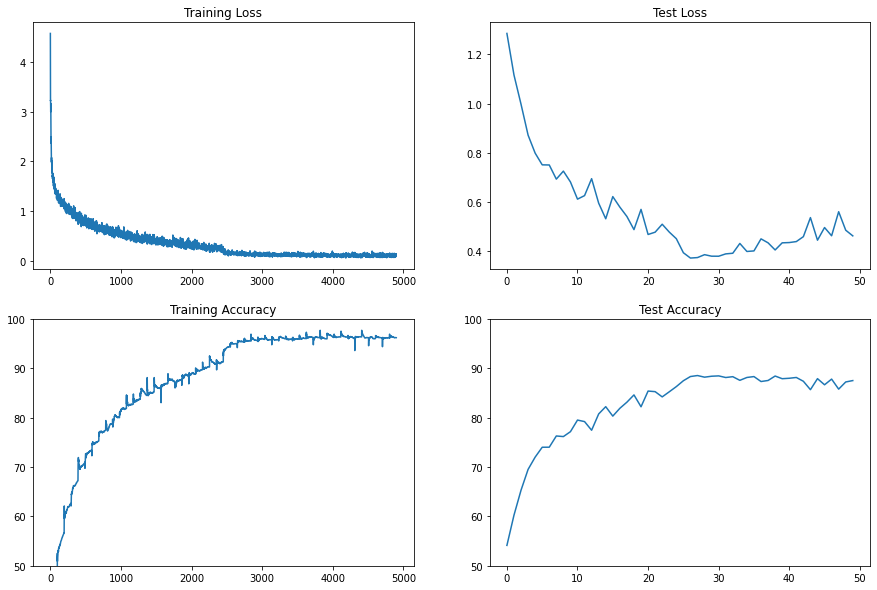

In [181]:
cnn_learner.plot_losses()

Test data Learner

In [182]:
from differencer import Interpreter

In [183]:
intrepret = Interpreter(model=cnn_learner.model, dataloader=image_loader.test_loader, classes=image_loader.classes)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Confusion Matrix

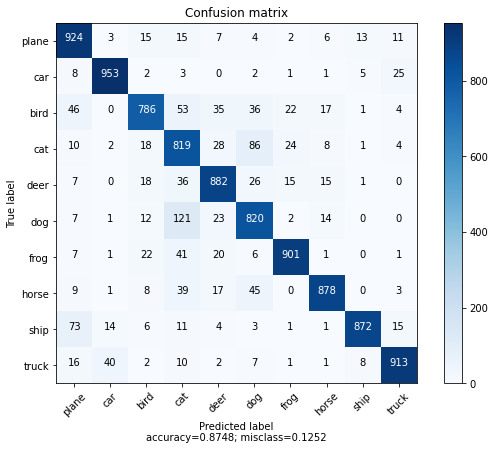

In [184]:
intrepret.plot_confusion_matrix()

Performance Metrics

In [185]:
intrepret.show_classification_report()

,precision,recall,f1-score,support
plane,0.884139,0.7860,0.832186,1000.0000
car,0.938916,0.9530,0.945906,1000.0000
bird,0.713415,0.8190,0.762570,1000.0000
cat,0.866405,0.8820,0.874133,1000.0000
deer,0.792271,0.8200,0.805897,1000.0000
dog,0.929825,0.9010,0.915185,1000.0000
frog,0.932059,0.8780,0.904222,1000.0000
horse,0.834688,0.9240,0.877076,1000.0000
ship,0.967814,0.8720,0.917412,1000.0000
truck,0.935451,0.9130,0.924089,1000.0000
